# Assignment 4: ENVPHYS200 Cryosphere Module 

# Melt rate estimations

how fast the ice will melt depends on parameters that need to be accurately measured to produce better predictions of sea-level rise.  Explore the parameters and quantify their effects on the output.  How sensitive is the melt rate to each of he parameters in the exercise?

$$a_b=\frac{\rho_w c_w \Gamma_{T S} C_d^{\frac{1}{2}} U\left(T_w-T_f\right)}{\rho_i\left(L_i+c_i\left(T_f-T_i\right)\right)}$$

The parameters for the equation are shown in the table below:

|Variable|Definition|Value [units]|
|:----|:----|:----|
|$a_b$|“ablation” or melt rate (m s-1)|What we need to estimate|
|$\rho_w,\rho_i$|Density of seawater and ice|1028 kg m-3;  916 kg m-3|
|$c_w, c_i$ |specific heat capacity of water and ice respectively.|4x10^3 J Kg-1 °C-1; 2x103 J Kg^-1 °C^-1|
|$\Gamma_{T S}$|A turbulent transfer coefficient (dimensionless) |0.006|
|$C_d$|Drag coefficient (dimensionless)|0.01|
|$U$|Flow speed near the ice|0.15  m s-1|
|$T_w,T_i$|Temperature of the seawater and the ice|-2.1 °C ;  -4 °C|
|$S_w$|Salinity of the seawater|34.8 g/kg|
|$T_f$|Freezing point of the sea water|-2.14 °C|
|$L_i$|latent heat of fusion|3.4x10^5 J Kg-1|

In [1]:
# Show your working in this cell or cells below


## A word on PDFs and CDFs of a random variable

PDF stands for Probability Density Function and it is a function within the range of the possible values of a random variable with an integral equal to one. This means, that the integral up to a value $x$ of the random variable quantifies the probability ($P(x)$) of reaching a value equal or less than $x$.  

The CDF or Cummulative density Function is the value of the integral of P(x) up to point $x$.

I illustrate the calculation below with a Gaussian pdf.

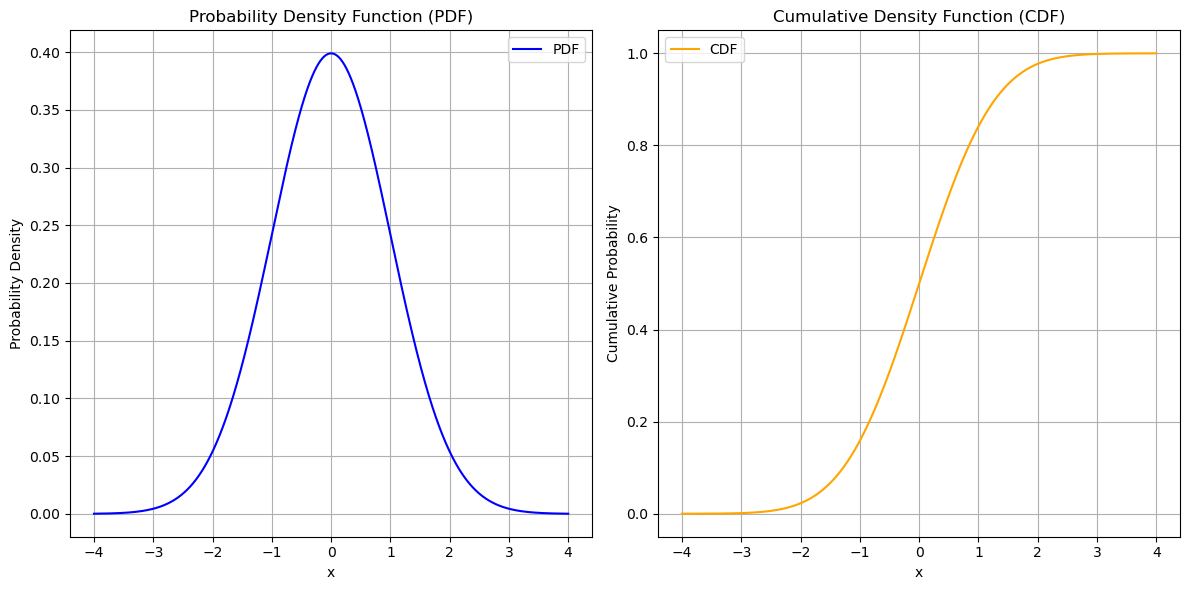

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the Gaussian distribution
mean = 0       # mean
std_dev = 1    # standard deviation

# Create a range of values
x = np.linspace(-4, 4, 1000)

# Calculate the PDF and CDF
pdf = norm.pdf(x, mean, std_dev)
cdf = norm.cdf(x, mean, std_dev)

# Plotting the PDF
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, pdf, color='blue', label='PDF')
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid()
plt.legend()

# Plotting the CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf, color='orange', label='CDF')
plt.title('Cumulative Density Function (CDF)')
plt.xlabel('x')
plt.ylabel('Cumulative Probability')
plt.grid()
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from ipywidgets import FloatSlider, interactive

# Parameters for the Gaussian distribution
mean = 0       # mean
std_dev = 1    # standard deviation

# Create a range of values
x = np.linspace(-4, 4, 1000)
pdf = norm.pdf(x, mean, std_dev)
cdf = norm.cdf(x, mean, std_dev)

def plot_gaussian(slider_value):
    plt.clf()  # Clear the current figure
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5)) 
    #plt.subplot(1, 2, 1)
    ax1.plot(x, pdf, color='blue', label='PDF')
    ax1.fill_between(x, pdf, where=(x <= slider_value), color='lightblue', alpha=0.5)
    ax1.axvline(slider_value, color='red', linestyle='--', label=f'Slider Value: {slider_value:.2f}')
    ax1.set_title('Probability Density Function (PDF)')
    ax1.set_xlabel('x')
    ax1.set_ylabel('Probability Density')
    ax1.set_xlim(-4, 4)
    ax1.set_ylim(0, np.max(pdf) * 1.1)
    ax1.grid()
    #plt.legend()

    #plt.subplot(1, 2, 2)
    ax2.plot(x, cdf, color='orange', label='CDF')
    ax2.axhline(norm.cdf(slider_value, mean, std_dev), color='red', linestyle='--', label=f'CDF Value: {norm.cdf(slider_value, mean, std_dev):.2f}')
    ax2.set_title('Cumulative Density Function (CDF)')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Cumulative Probability')
    ax2.set_xlim(-4, 4)
    ax2.set_ylim(0, 1.1)
    ax2.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create a slider
slider = FloatSlider(value=0, min=-4, max=4, step=0.1, description='Slider Value', continuous_update=False)

# Create an interactive plot
interactive_plot = interactive(plot_gaussian, slider_value=slider)
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot


interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='Slider Value', max=4.0, min…

# The Reverse CDF is more intuitive

The reverse CDF can be thought of as the probability of a value happening up to a certain value.

In [4]:
# Parameters for the Gaussian distribution
mean = 1.06       # mean
std_dev = 0.1    # standard deviation

# Create a range of values
ulim =  mean + 5*std_dev
llim =  mean - 5*std_dev
x = np.linspace(llim, ulim , 1000)
pdf = norm.pdf(x, mean, std_dev)
cdf = norm.cdf(x, mean, std_dev)

def plot_gaussian(slider_value):
    plt.clf()  # Clear the current figure
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5)) 
    #plt.subplot(1, 2, 1)
    ax1.plot(x, pdf, color='blue', label='PDF')
    ax1.fill_between(x, pdf, where=(x <= slider_value), color='lightblue', alpha=0.5)
    ax1.axvline(slider_value, color='red', linestyle='--', label=f'Slider Value: {slider_value:.2f}')
    ax1.set_title('Probability Density Function (PDF)')
    ax1.set_xlabel('x')
    ax1.set_ylabel('Probability Density')
    ax1.set_xlim(llim, ulim)
    ax1.set_ylim(0, np.max(pdf) * 1.1)
    ax1.grid()
    #plt.legend()

    #plt.subplot(1, 2, 2)
    ax2.plot(x, 1 - cdf, color='orange', label='Reverse CDF')
    ax2.axhline(1- norm.cdf(slider_value, mean, std_dev), color='red', linestyle='--', label=f'Reverse CDF Value: {1 - norm.cdf(slider_value, mean, std_dev):.2f}')
    ax2.set_title('Reverse CDF')
    ax2.set_xlabel('x')
    ax2.set_ylabel('Cumulative Probability')
    ax2.set_xlim(llim, ulim)
    ax2.set_ylim(0, 1.1)
    ax2.grid()
    #plt.gca().invert_xaxis()
    plt.legend()

    plt.tight_layout()
    plt.show()

# Create a slider
slider = FloatSlider(value=mean, min=llim, max=ulim, step=0.1, description='Slider Value', continuous_update=False)

# Create an interactive plot
interactive_plot = interactive(plot_gaussian, slider_value=slider)
output = interactive_plot.children[-1]
output.layout.height = '400px'
interactive_plot

interactive(children=(FloatSlider(value=1.06, continuous_update=False, description='Slider Value', max=1.56, m…